In [2]:
## Load bigquery
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [21]:
%%bigquery
SELECT
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS YEAR,
    EXTRACT(MONTH FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS MONTH,
    COUNT(*) AS COMMITS
FROM `bigquery-public-data.github_repos.commits`
WHERE
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) BETWEEN 2009 AND 2019
GROUP BY YEAR, MONTH
HAVING count(*) >100
ORDER BY YEAR ASC, MONTH ASC

,YEAR,MONTH,COMMITS
0,2019,4,88290
1,2019,3,907489
2,2019,2,945308
3,2019,1,1105714
4,2018,12,1024567
5,2018,11,1199066
6,2018,10,1346492
7,2018,9,1251407
8,2018,8,1349346
9,2018,7,1347084


In [36]:
%%bigquery total_commits
SELECT
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS YEAR,
    EXTRACT(MONTH FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS MONTH,
    COUNT(*) AS COMMITS
FROM `bigquery-public-data.github_repos.commits`
WHERE
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) BETWEEN 2009 AND 2019
GROUP BY YEAR, MONTH
HAVING count(*) >100
ORDER BY YEAR ASC, MONTH ASC

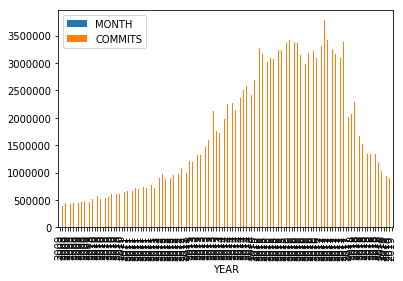

In [37]:
total_commits.plot(kind='bar', x='YEAR');

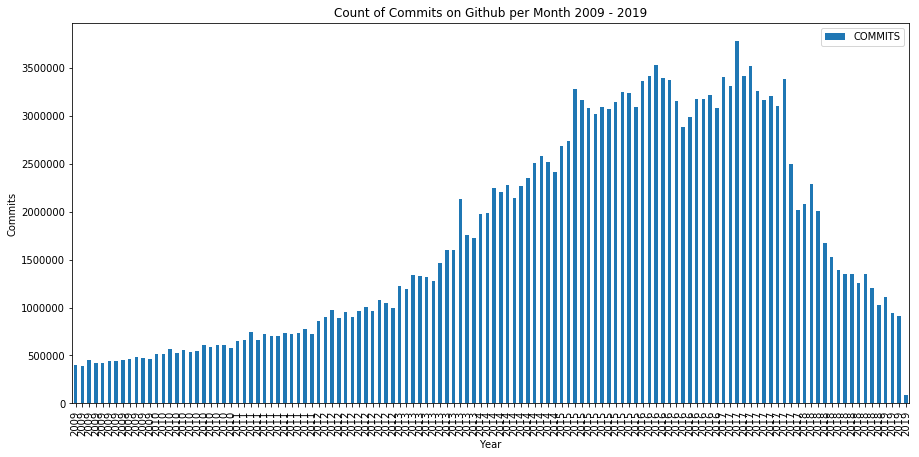

In [52]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
SELECT
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS YEAR,
    EXTRACT(MONTH FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS MONTH,
    COUNT(*) AS COMMITS
FROM `bigquery-public-data.github_repos.commits`
WHERE
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) BETWEEN 2009 AND 2019
GROUP BY YEAR, MONTH
HAVING count(*) >100
ORDER BY YEAR ASC, MONTH ASC
"""
df = client.query(sql).to_dataframe()
ax = df.plot(kind='bar', x='YEAR', y='COMMITS', figsize=(15,7))
ax.set_title('Count of Commits on Github per Month 2009 - 2019')
ax.set_xlabel('Year')
ax.set_ylabel('Commits');

In [ ]:
## Most (50) common Go packages from Github (BigQuery Dataset)

In [40]:
from google.cloud import bigquery
client = bigquery.Client()
job_config = bigquery.QueryJobConfig()
job_config.use_legacy_sql = True
sql = """
SELECT
  REGEXP_EXTRACT(line, r'"([^"]+)"') AS url,
  COUNT(*) AS count
FROM
  FLATTEN( (
    SELECT
      SPLIT(SPLIT(REGEXP_EXTRACT(content, r'.*import\s*[(]([^)]*)[)]'), '\n'), ';') AS line,
    FROM (
      SELECT
        id,
        content
      FROM
        [bigquery-public-data:github_repos.contents]
      WHERE
        REGEXP_MATCH(content, r'.*import\s*[(][^)]*[)]')) AS C
    JOIN (
      SELECT
        id
      FROM
        [bigquery-public-data:github_repos.files]
      WHERE
        path LIKE '%.go'
      GROUP BY
        id) AS F
    ON
      C.id = F.id), line)
GROUP BY
  url
HAVING
  url IS NOT NULL
ORDER BY
  count DESC
LIMIT 50
"""
df = client.query(sql,job_config=job_config).to_dataframe()
df

,url,count
0,fmt,745674
1,time,420785
2,strings,392117
3,testing,335627
4,os,328688
5,net/http,241504
6,io,206225
7,bytes,204106
8,errors,196416
9,io/ioutil,183848


In [ ]:
## Check repos created per year / month

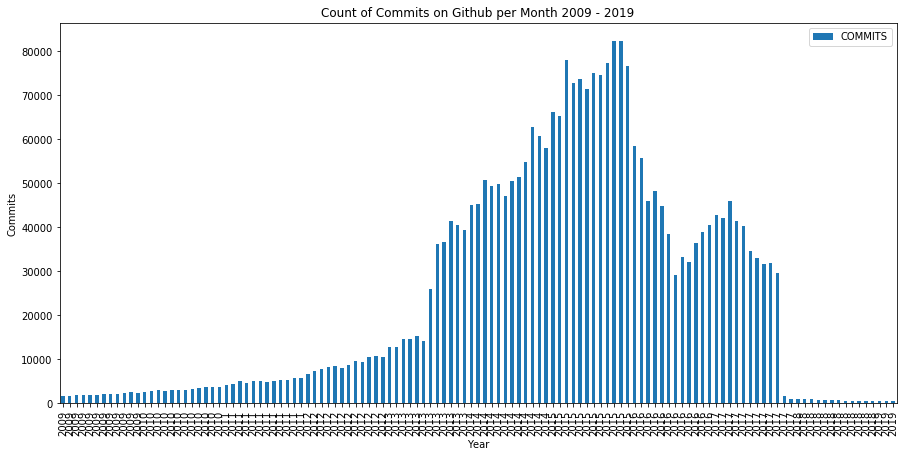

In [54]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
SELECT
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS YEAR,
    EXTRACT(MONTH FROM TIMESTAMP_SECONDS(committer.date.seconds)) AS MONTH,
    COUNT(*) AS COMMITS,
    ARRAY_LENGTH(parent) as PARLEN
FROM `bigquery-public-data.github_repos.commits`
WHERE
    EXTRACT(YEAR FROM TIMESTAMP_SECONDS(committer.date.seconds)) BETWEEN 2009 AND 2019
    AND ARRAY_LENGTH(parent) = 0
GROUP BY YEAR, MONTH, PARLEN
HAVING count(*) >100
ORDER BY YEAR ASC, MONTH ASC
"""
df = client.query(sql).to_dataframe()
ax = df.plot(kind='bar', x='YEAR', y='COMMITS', figsize=(15,7))
ax.set_title('Count of Commits on Github per Month 2009 - 2019')
ax.set_xlabel('Year')
ax.set_ylabel('Commits');

In [41]:
import os

API_KEY = os.getenv("LIBRARIES_IO_KEY")
%env LIBRARIES_BASE_URL=https://libraries.io/api/
LIBRARIES_BASE_URL = os.getenv("LIBRARIES_BASE_URL")

env: LIBRARIES_BASE_URL=https://libraries.io/api/


In [42]:
import requests, pandas as pd

request_url = "platforms?api_key"
url = LIBRARIES_BASE_URL+request_url+API_KEY
response = requests.get(url)
data = response.json()
df = pd.DataFrame.from_dict(data)
df.head

<bound method NDFrame.head of       color default_language                                   homepage  \
0   #375eab             None                      http://go-search.org/   
1   #f1e05a       JavaScript                      https://www.npmjs.com   
2   #4F5D95              PHP                      https://packagist.org   
3   #b07219             Java                           http://maven.org   
4   #3572A5           Python                          https://pypi.org/   
5   #178600               C#                      https://www.nuget.org   
6   #701516             Ruby                       https://rubygems.org   
7   #563d7c              CSS                            http://bower.io   
8   #4F5D95              PHP              https://wordpress.org/plugins   
9   #438eff      Objective-C                      http://cocoapods.org/   
10  #0298c3             Perl                       https://metacpan.org   
11  #dea584             Rust                          https://crates.i